In [1]:
import os
import numpy as np
import librosa
import scipy
import matplotlib.pyplot as plt

In [2]:
data_path = './dataset/'

In [3]:
dataset = 'train'

with open(data_path + dataset + '_list.txt', 'r') as f:
    paths = [data_path + filename.rstrip('\n') for filename in f]

In [39]:
i = 44

In [138]:
i = 0

In [146]:
400 / sr * 1000

25.0

In [251]:
i = 600

860 ./dataset/train/string_acoustic_018-061-100.wav


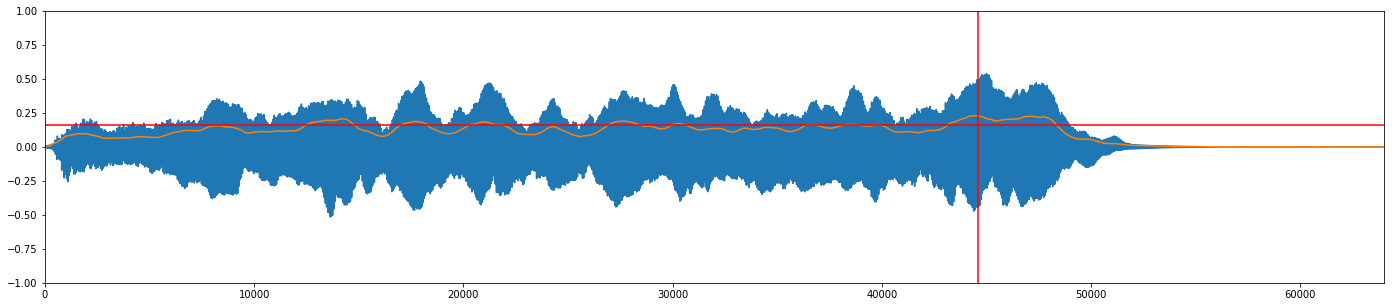

In [265]:
file_path = paths[i]
sig, sr = librosa.load(file_path, sr=None)
# env = np.abs(scipy.signal.hilbert(sig))
env = librosa.feature.rms(y=sig, frame_length=400, hop_length=200)[0]
t = np.linspace(0, len(sig), len(env))

plt.figure(figsize=(24, 5))
plt.plot(sig)
plt.plot(t, env)
# plt.axhline(y=env.max() * 0.10, color='r')
plt.axhline(y=env.max() * 0.70, color='r')
plt.axvline(x=t[env.argmax()], color='r')
plt.xlim(0, len(sig))
# plt.xlim(0, sr * 0.5)
plt.ylim(-1, 1)
print(i, file_path)
i += 20

In [118]:
500 /16000

0.03125

In [41]:
len(sig) / sr

4.0

(0, 64000)

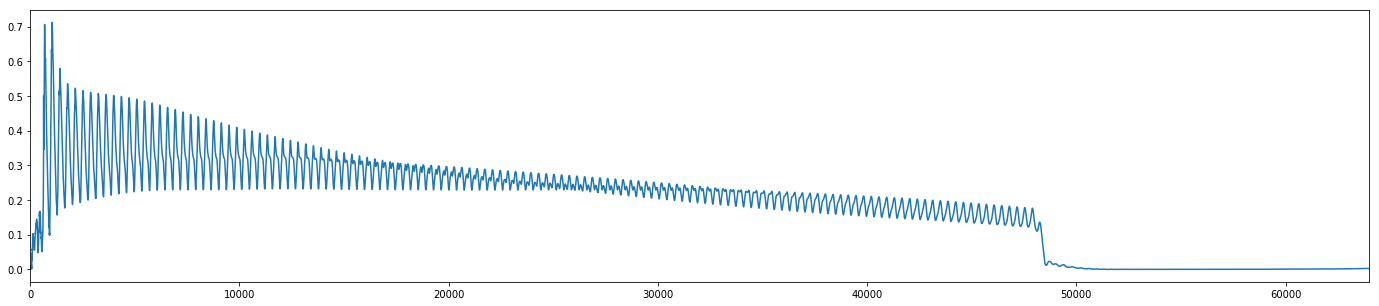

In [7]:
plt.figure(figsize=(24, 5))
# plt.plot(sig)
plt.plot(np.abs(scipy.signal.hilbert(sig)))
plt.xlim(0, len(sig))

In [8]:
import essentia
import essentia.standard as es

# Compute all features, aggregate only 'mean' and 'stdev' statistics for all low-level, rhythm and tonal frame features
features, features_frames = es.MusicExtractor(lowlevelStats=['mean', 'stdev'],
                                              rhythmStats=['mean', 'stdev'],
                                              tonalStats=['mean', 'stdev'])(file_path)

# See all feature names in the pool in a sorted order
print(sorted(features.descriptorNames()))

['lowlevel.average_loudness', 'lowlevel.barkbands.mean', 'lowlevel.barkbands.stdev', 'lowlevel.barkbands_crest.mean', 'lowlevel.barkbands_crest.stdev', 'lowlevel.barkbands_flatness_db.mean', 'lowlevel.barkbands_flatness_db.stdev', 'lowlevel.barkbands_kurtosis.mean', 'lowlevel.barkbands_kurtosis.stdev', 'lowlevel.barkbands_skewness.mean', 'lowlevel.barkbands_skewness.stdev', 'lowlevel.barkbands_spread.mean', 'lowlevel.barkbands_spread.stdev', 'lowlevel.dissonance.mean', 'lowlevel.dissonance.stdev', 'lowlevel.dynamic_complexity', 'lowlevel.erbbands.mean', 'lowlevel.erbbands.stdev', 'lowlevel.erbbands_crest.mean', 'lowlevel.erbbands_crest.stdev', 'lowlevel.erbbands_flatness_db.mean', 'lowlevel.erbbands_flatness_db.stdev', 'lowlevel.erbbands_kurtosis.mean', 'lowlevel.erbbands_kurtosis.stdev', 'lowlevel.erbbands_skewness.mean', 'lowlevel.erbbands_skewness.stdev', 'lowlevel.erbbands_spread.mean', 'lowlevel.erbbands_spread.stdev', 'lowlevel.gfcc.cov', 'lowlevel.gfcc.icov', 'lowlevel.gfcc.mean

In [14]:
features_frames['lowlevel.mfcc'].shape

(174, 13)

In [11]:
features_frames.descriptorNames()

['lowlevel.average_loudness',
 'lowlevel.dynamic_complexity',
 'lowlevel.loudness_ebu128.integrated',
 'lowlevel.loudness_ebu128.loudness_range',
 'metadata.audio_properties.analysis.equal_loudness',
 'metadata.audio_properties.analysis.length',
 'metadata.audio_properties.analysis.sample_rate',
 'metadata.audio_properties.analysis.start_time',
 'metadata.audio_properties.bit_rate',
 'metadata.audio_properties.length',
 'metadata.audio_properties.lossless',
 'metadata.audio_properties.number_channels',
 'metadata.audio_properties.replay_gain',
 'metadata.audio_properties.sample_rate',
 'rhythm.bpm',
 'rhythm.bpm_histogram_first_peak_bpm',
 'rhythm.bpm_histogram_first_peak_weight',
 'rhythm.bpm_histogram_second_peak_bpm',
 'rhythm.bpm_histogram_second_peak_spread',
 'rhythm.bpm_histogram_second_peak_weight',
 'rhythm.danceability',
 'rhythm.onset_rate',
 'tonal.chords_changes_rate',
 'tonal.chords_number_rate',
 'tonal.key_edma.strength',
 'tonal.key_krumhansl.strength',
 'tonal.key_tem